
## Instructions
*   Do not write your name or email anywhere
*   Remember to only write in code blocks that say TODO
* Change the file name to Q1_{{Your ID}} before submitting




# Question 1

The school has just finished an important test, taken by 500 students. In order to understand what influences exam performance, the school collected data on each student's preparation for the exam:
* `hours_studied[i]`: The number of hours student `i` spent studying the night before the test
* `passed[i]`: Whether student `i` passed the test (`1` for pass, `0` for fail).

You've been asked by the school to use this data to determine whether a student will pass or fail based on how much they study.

## Setup

Run the code cell below

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

hours_studied = [6.5, 5.31, 7.72, 6.06, 0.05, 5.93, 4.85, 7.42, 1.56, 5.61, 4.22, 1.29, 3.12, 0.75, 0.68, 0.74, 4.73, 1.3, 8.92, 4.43, 0.67, 1.52, 6.76, 5.07, 0.23, 0.05, 9.9, 6.56, 6.42, 0.09, 5.91, 5.37, 1.86, 8.92, 6.49, 4.52, 8.4, 4.26, 4.12, 5.68, 1.13, 8.21, 1.99, 6.94, 0.16, 9.11, 3.48, 7.72, 1.64, 7.66, 9.46, 2.89, 1.51, 7.6, 2.59, 6.77, 1.75, 0.57, 8.88, 5.21, 9.82, 5.21, 8.35, 2.22, 3.61, 8.74, 2.14, 4.66, 3.87, 2.39, 7.75, 5.95, 1.92, 8.81, 7.8, 3.86, 7.76, 2.05, 2.42, 7.86, 2.29, 3.88, 6.43, 6.87, 0.48, 5.66, 5.61, 9.23, 4.72, 4.38, 8.07, 0.18, 7.84, 5.16, 7.12, 5.21, 6.94, 2.37, 7.7, 8.39, 4.94, 0.36, 4.33, 2.37, 4.24, 0.48, 1.41, 4.41, 2.84, 0.62, 9.28, 6.8, 5.79, 9.33, 2.66, 7.44, 3.2, 3.97, 9.14, 6.74, 1.96, 4.06, 3.9, 0.83, 8.22, 8.97, 2.58, 4.04, 3.55, 2.44, 1.15, 9.13, 9.99, 7.57, 5.62, 8.19, 0.69, 6.5, 1.5, 3.64, 6.68, 3.89, 4.42, 4.19, 6.19, 6.65, 7.31, 5.3, 8.53, 0.53, 0.74, 0.58, 7.12, 2.11, 9.26, 0.09, 5.43, 4.3, 2.24, 1.35, 2.55, 2.81, 5.53, 8.41, 9.57, 4.62, 6.87, 4.59, 8.56, 1.66, 2.29, 0.61, 5.31, 6.33, 8.76, 3.96, 1.39, 1.27, 2.89, 6.55, 2.32, 9.62, 2.29, 5.06, 3.71, 6.43, 2.31, 2.38, 3.02, 7.3, 7.83, 1.31, 5.6, 2.91, 4.11, 0.4, 6.73, 1.71, 5.53, 5.97, 7.91, 5.81, 4.92, 5.55, 4.81, 4.62, 8.98, 9.53, 5.18, 1.55, 2.04, 1.16, 9.92, 3.16, 9.49, 1.69, 3.67, 0.14, 3.13, 5.49, 6.96, 4.38, 4.41, 7.12, 8.9, 3.83, 1.98, 0.92, 5.12, 7.02, 8.42, 4.88, 6.81, 0.67, 5.81, 3.8, 5.7, 8.18, 8.16, 1.5, 9.43, 9.26, 4.71, 7.57, 4.31, 7.37, 6.58, 5.25, 8.83, 2.97, 4.97, 3.39, 5.7, 1.88, 1.74, 4.56, 0.16, 1.89, 5.11, 3.76, 7.3, 5.88, 5.31, 6.96, 8.4, 9.27, 8.05, 3.54, 2.17, 9.86, 7.89, 0.12, 7.96, 0.73, 5.9, 1.44, 9.38, 4.88, 8.01, 8.49, 6.93, 6.56, 9.35, 0.01, 7.17, 9.5, 6.89, 3.94, 3.42, 8.14, 2.12, 0.11, 7.57, 0.75, 8.61, 7.72, 5.23, 8.49, 2.7, 7.1, 1.67, 6.14, 2.46, 2.76, 1.83, 1.4, 7.4, 7.09, 0.05, 6.37, 4.83, 3.7, 8.31, 0.4, 7.82, 5.32, 2.11, 6.01, 6.97, 5.54, 3.27, 4.23, 7.13, 2.13, 5.61, 8.2, 2.62, 9.7, 0.14, 2.16, 0.91, 3.83, 4.73, 9.65, 8.55, 1.77, 5.32, 9.28, 5.61, 1.89, 1.31, 2.77, 3.44, 4.56, 5.47, 5.67, 6.23, 4.11, 7.37, 3.04, 6.21, 4.61, 2.46, 9.36, 9.56, 4.74, 3.52, 5.45, 1.04, 7.35, 4.32, 5.98, 0.17, 7.99, 5.07, 2.05, 8.68, 7.95, 5.24, 9.83, 0.48, 5.91, 9.44, 1.06, 2.39, 5.03, 3.52, 3.26, 3.05, 2.33, 6.46, 3.2, 3.84, 8.46, 9.63, 4.61, 2.72, 5.84, 4.07, 3.14, 2.67, 6.93, 7.47, 0.91, 9.82, 6.35, 7.4, 3.35, 8.71, 6.16, 3.47, 6.59, 5.18, 4.85, 7.61, 3.76, 9.98, 2.89, 6.33, 3.79, 3.79, 7.22, 7.54, 0.75, 3.03, 3.62, 7.13, 3.91, 6.65, 5.62, 4.47, 4.61, 1.47, 1.46, 7.18, 1.23, 0.27, 3.45, 3.31, 7.65, 5.28, 8.0, 7.93, 5.68, 2.88, 3.52, 0.04, 3.35, 2.63, 3.37, 5.38, 0.86, 0.93, 8.26, 6.36, 1.99, 6.11, 9.03, 9.2, 6.33, 9.9, 5.14, 0.95, 0.31, 9.95, 7.01, 7.41, 4.77, 6.99, 4.51, 4.38, 7.92, 9.56, 4.54, 2.46, 4.84, 6.46, 5.55, 7.75, 0.58, 3.95, 6.4, 5.69, 8.97, 4.68, 2.17, 6.72, 3.89, 6.25, 2.35, 3.91, 8.13, 0.68, 0.28, 3.79, 0.85, 0.55, 7.1, 4.22, 2.38, 4.78, 8.88, 0.98, 4.25, 8.16, 4.18, 6.54, 6.64, 4.98, 7.17]
passed = [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]


## Problem 1


The method you will use to make these predictions is **logistic regression**.

Logistic regression makes a prediction based on `hours_studied[i]`$ = x_{i}$ to determine the probability that student $i$ passed (i.e. the probability that`passed[i]`$= 1$). The formula it uses to determine this is:

$\mathbb{P}(\text{Student } i \text{ passed}) = \dfrac{1}{1+e^{-(w_{1}x_{i} + b)}}$

**Task** **[4 marks]**:

 Write a class for a logistic regression model below that:

1. Defines `w1`, and `b` and associates it to the class.
2. Has a forward method that takes in `hours_studied` and returns a **list** `predictions`, where `predictions[i]` is the estimated probability that student `i` passed the test according to the logistic regression model computed with $w_{1}$ and $b$.

In [5]:
class LogisticRegression():
    def __init__(self, w1, b):
        self.w1 = w1
        self.b = b
        
        # init function, self command
        # https://www.w3schools.com/python/gloss_python_class_init.asp


    def forward(self, hours_studied):
        predictions = []
        for x in hours_studied:
            pass_probability = 1/(1+math.exp(-(self.w1*x+self.b)))
            predictions.append(pass_probability)
        return(predictions)

        

model = LogisticRegression(0, 0)

**Task** **[2 marks]**:

1. Explain in the code block below why the probability that a given student passed will always remain between 0 and 1, when calculated with this formula

In [ ]:
# TODO: Write your answer as a comment in this code block.

#Problem 2


Now we want our model to actually fit the data. In order to do this, we need to choose values for `w1` and `b` according to the data we have.

To do this, define a list:
* `error[i]` $=$ `passed[i]`$-$ `predictions[i]`

and a variable
* `lr` - this stands for "learning rate" and controls how much we adjust the model according to its error (in general, it should be a very small value, e.g. $0.001$).

Then adjust `w1` and `b` according to the rules:
* `w1_new` $=$ `w1` + `lr` $\cdot \sum_{i=1}^{500}$ `error[i]` $\cdot$ `hours_studied[i]`

* `b_new` $=$ `b` + `lr` $\cdot \sum_{i=1}^{500}$ `error[i]`

**Task** **[3 marks]**:

Write a function which runs this update rule **one time**, and updates `w1` and `b` in the logistic regression model with `w1_new` and `b_new`.

In [11]:
def improve_model(passed, hours_studied, model, lr):
    error = []
    predictions = model.forward(hours_studied)
    for x,y in zip(passed, predictions):
        error1 = x - y
        error.append(error1)
    # https://flexiple.com/python/python-list-minus-list
    
    w1_new = model.w1 + lr*sum([error[i]*hours_studied[i] for i in range(len(error))])
    b_new = model.b + lr*sum([error[i] for i in range(len(error))])
    model.w1 = w1_new
    model.b = b_new
    return w1_new, b_new


    


    

## Problem 3


Now we're going to train the model by applying this update rule multiple times in succession, until the model's predictions make sense.

**Task:** **[4 marks]**:

1. You should write a `train` function which uses the `improve_model` function you implemented above to **iteratively** modify `w1` and `b` in the logistic regression class.

Try different starting values of `w1` and `b`, and different (very small) sizes for `lr`. You should be able to get your values for `w1` and `b` to stabilise (you may want to print the values for `w1` and `b` in order to see whether the values are stabilising or not).

In [12]:
def train(num_iterations, passed, hours_studied, model, lr):
    w1, b = model.w1, model.b
    for i in range(num_iterations): 
        w1, b = improve_model(passed, hours_studied,model, lr)
        
    model.w1, model.b = w1, b  
    return w1, b
    

w1, b = train(10000, passed, hours_studied, model, lr)

Running the cell below will let you see a plot of your logistic regression function for the probability that a student will pass, as well as whether the student actually passed or not.

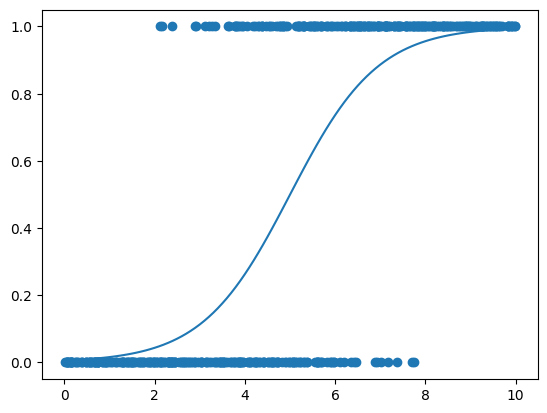

In [13]:
plt.scatter(hours_studied, passed)
plt.plot([0.1*i for i in range(0,100)], model.forward([0.1*i for i in range(0,100)]))
plt.show()

Ultimately, the teachers want to know whether a student is more likely to pass, or more likely to fail. If they are more likely to pass, then we categorise them as a pass. Otherwise, we categorise them as a fail.

**Task** **[2 marks]**:
Write a function which takes the output of your trained logistic regression model, and outputs a list `pass_or_fail` where `pass_or_fail[i]=1` if the model predicts the student is more likely to pass, and `pass_or_fail[i]=0` otherwise.

In [14]:
def make_pass_or_fail_prediction(model):
    predictions = model.forward(hours_studied)
    pass_or_fail = [1 if prob >= 0.5 else 0 for prob in predictions]
    # List comprehension https://www.geeksforgeeks.org/python-list-comprehension-using-if-else/
    return pass_or_fail

**Task** **[2 marks]**

Now write a function which takes in our `pass_or_fail` list of predictions, as well as the true `passed` list, and outputs the proportion of students for which our function predicted the answer correctly.

Your function should output a number in the range $[0,1]$ corresponding to the accuracy of the logistic regression model.

In [ ]:
def accuracy(prediction, passed):
    #TODO
    pass

print(accuracy(make_pass_or_fail_prediction(model), passed))

## Problem 4

The teachers have now asked the students how much sleep they got the night before the test, captured in the list above, and they want to incorporate this data into their predictions. The logistic regression function we will use now is:

$\mathbb{P}(\text{Student } i \text{ passed}) = \dfrac{1}{1+e^{-(w_{1}x_{i} + w_{2}y_{i} + b)}}$

with $x_{i} = $ `hours_studied[i]` and $y_{i} = $ `hours_slept[i]`.

The list of `hours_slept` data is in the code block below.

In [ ]:
hours_slept = [8.24, 4.99, 6.49, 8.32, 8.81, 4.63, 8.46, 5.43, 7.47, 8.77, 5.99, 8.75, 8.18, 6.24, 4.44, 4.51, 6.73, 4.46, 4.01, 6.54, 4.77, 8.79, 4.17, 5.68, 7.95, 7.34, 4.14, 7.5, 7.71, 6.23, 7.58, 4.82, 5.28, 6.25, 4.31, 5.5, 8.23, 4.99, 7.02, 5.13, 5.58, 8.66, 6.99, 5.34, 6.92, 6.29, 4.28, 6.48, 8.09, 5.56, 8.34, 7.83, 6.38, 7.93, 4.67, 5.29, 7.09, 8.64, 8.38, 5.16, 5.94, 5.56, 5.39, 4.46, 6.74, 8.22, 5.03, 6.04, 4.35, 8.48, 4.01, 7.34, 8.84, 7.57, 8.73, 4.87, 5.86, 4.3, 4.0, 7.01, 8.25, 5.77, 5.93, 4.29, 4.65, 7.45, 8.06, 8.84, 4.69, 8.39, 6.57, 5.52, 5.55, 4.87, 5.22, 4.83, 7.33, 5.35, 4.27, 6.13, 8.73, 5.29, 4.8, 6.97, 5.24, 5.3, 7.72, 4.84, 8.61, 5.29, 7.27, 5.62, 8.81, 7.73, 8.46, 8.1, 8.59, 7.63, 7.38, 7.69, 7.5, 5.83, 4.77, 7.89, 8.38, 6.17, 6.53, 8.69, 5.35, 5.57, 6.02, 6.18, 6.77, 8.3, 4.47, 5.35, 6.28, 8.89, 6.7, 7.05, 8.28, 7.89, 4.96, 8.46, 4.47, 7.42, 5.2, 7.61, 5.04, 4.24, 8.61, 4.37, 5.39, 6.24, 7.5, 6.84, 7.02, 6.27, 5.62, 7.37, 5.72, 4.12, 8.21, 7.44, 6.96, 5.27, 6.38, 5.2, 5.95, 6.62, 5.22, 4.56, 5.81, 6.79, 6.1, 6.05, 6.62, 8.25, 7.91, 5.46, 7.29, 6.43, 8.27, 4.72, 5.66, 4.76, 7.03, 7.13, 5.98, 4.06, 6.56, 7.17, 4.53, 7.3, 6.5, 6.97, 5.3, 4.72, 7.33, 5.63, 7.74, 5.8, 5.18, 4.79, 6.11, 4.47, 7.78, 6.6, 8.89, 8.5, 7.98, 5.82, 4.21, 4.48, 4.55, 7.4, 6.86, 8.73, 5.93, 7.66, 4.25, 7.33, 7.34, 6.96, 8.73, 7.9, 5.15, 5.68, 4.72, 5.97, 8.27, 7.55, 5.89, 5.95, 8.56, 7.73, 4.22, 5.05, 4.98, 4.64, 8.73, 5.98, 4.99, 4.42, 8.28, 4.37, 7.05, 6.2, 7.14, 6.7, 5.74, 4.26, 5.85, 7.78, 5.74, 4.36, 8.42, 6.81, 4.43, 5.07, 8.52, 4.88, 8.67, 5.74, 7.82, 8.74, 5.23, 6.34, 8.38, 7.9, 7.08, 7.9, 6.43, 7.02, 6.88, 5.34, 4.11, 6.5, 4.68, 7.94, 6.49, 6.5, 8.28, 8.0, 4.5, 4.66, 4.28, 6.58, 6.84, 8.57, 7.98, 5.71, 5.36, 8.32, 7.6, 8.46, 4.03, 7.48, 5.91, 5.0, 7.82, 7.67, 4.79, 6.15, 6.42, 6.84, 5.5, 6.97, 7.09, 7.79, 6.08, 6.93, 7.12, 5.27, 7.08, 8.82, 6.71, 5.65, 5.9, 6.96, 7.78, 4.43, 6.23, 8.41, 6.34, 7.54, 4.82, 8.43, 6.43, 5.46, 6.52, 5.5, 8.81, 4.87, 8.82, 5.37, 6.38, 6.32, 5.05, 4.86, 4.06, 4.91, 4.64, 6.77, 7.25, 4.72, 6.99, 4.37, 4.84, 4.59, 8.0, 7.07, 4.77, 4.28, 5.5, 5.96, 4.58, 5.23, 8.4, 4.64, 4.01, 4.09, 4.34, 6.34, 4.39, 5.93, 8.43, 6.4, 6.64, 4.36, 7.35, 4.16, 7.63, 4.48, 7.73, 4.46, 4.19, 7.88, 4.69, 6.12, 4.49, 7.66, 8.53, 4.12, 4.83, 5.41, 8.77, 7.79, 6.69, 6.11, 7.41, 5.01, 7.83, 8.94, 5.41, 8.65, 8.0, 8.93, 8.21, 4.84, 6.84, 4.11, 7.48, 6.28, 8.34, 4.69, 5.03, 5.24, 8.62, 5.18, 6.87, 8.79, 5.02, 5.66, 6.88, 8.31, 4.34, 5.03, 8.85, 4.24, 8.95, 6.02, 5.82, 7.38, 4.32, 6.72, 5.04, 4.21, 4.66, 7.15, 8.05, 7.22, 5.58, 7.71, 8.72, 4.61, 6.5, 5.19, 5.25, 8.4, 5.64, 8.77, 5.67, 4.12, 4.5, 5.48, 4.72, 5.48, 6.56, 6.95, 5.33, 7.36, 4.39, 4.4, 5.83, 4.57, 6.89, 8.98, 4.99, 5.56, 6.97, 6.12, 4.11, 8.09, 6.17, 8.57, 8.62, 6.53, 5.47, 7.63, 5.65, 7.9, 4.03, 6.28, 8.22, 4.99, 8.31, 8.1, 6.15, 8.05, 5.09, 4.52, 6.96, 8.43, 8.32, 6.18, 5.4, 7.79, 8.28, 5.07, 7.91, 7.67, 5.64, 4.84, 8.74, 5.13, 6.79, 6.18, 7.15, 6.81]

**Task:** **[3 marks]** Write a modified version of your `logistic_regression` class in Problem 1, which

1. Initialises using `w2` as well as `w1` and `b`.
2. Makes predictions using `hours_slept` as well as `hours_studied`.

In [ ]:
class LogisticRegressionWithHoursSlept():
    def __init__(self, w1, w2, b):
        #TODO
    def forward(self, hours_studied, hours_slept):
        #TODO

model_with_hours_slept = LogisticRegressionWithHoursSlept(0, 0, 0)

## Problem 5


**Task:** **[3 marks]** Now, write a modified `improve_model` function which adjusts your new model's `w1`, `w2`, and `b` properties according to the update rule. The update rule is similar to the one we had before, but must update `w2` in addition to `w1` and `b`.

In [ ]:
def improve_model_with_hours_slept(passed, hours_studied, hours_slept, model, lr):
    #TODO

## Problem 6

**Task** **[3 marks]**: Now write a modified version of the `train` function below, which should be similar to the train function you used earlier, in order to improve the model

In [ ]:
def train_with_hours_slept(num_iterations, passed, hours_studied, hours_slept, model, lr):
    #TODO

train_with_hours_slept(10000, passed, hours_studied, hours_slept, model, lr)

**Task** **[1 mark]**: Now also modify your `make_pass_or_fail_prediction` function from earlier, to make final predictions based on our updated logistic regression model.

In [ ]:
def make_pass_or_fail_prediction_with_hours_slept(model):
    #TODO


accuracy(make_pass_or_fail_prediction_with_hours_slept(model_with_hours_slept), passed)

## Problem 7

The teachers realise that they've forgotten to give the exam to 100 of the students, however they notice that this would be a perfect chance for you to test whether your model will work on future students. The data below represents the hours studied, hours_slept, and whether these additional 100 students passed.

**Task**: **[3 marks]** Determine whether including hours_slept in our prediction actually improved it by testing both of your logistic regression models, and seeing which one attains higher accuracy (*don't* retrain on this new data).

In [ ]:
hours_studied_test = [9.96, 9.81, 3.3, 3.9, 9.28, 9.08, 1.16, 2.69, 7.18, 7.26, 5.53, 5.77, 7.49, 0.28, 4.26, 8.31, 1.12, 9.16, 0.58, 9.95, 6.58, 8.42, 9.84, 0.5, 3.31, 6.39, 2.13, 3.72, 1.64, 2.16, 0.57, 5.8, 4.16, 6.4, 2.33, 4.44, 0.06, 2.21, 5.67, 2.58, 0.8, 3.92, 5.52, 4.29, 0.49, 0.5, 3.8, 8.38, 5.06, 6.91, 7.33, 6.22, 1.52, 7.91, 5.53, 3.19, 5.02, 2.73, 9.6, 1.92, 7.35, 5.09, 4.12, 6.75, 2.14, 2.42, 3.13, 2.71, 1.83, 0.74, 6.48, 0.14, 5.23, 3.58, 4.85, 2.56, 2.15, 8.37, 3.94, 3.83, 8.62, 9.26, 8.2, 0.44, 3.0, 4.16, 3.61, 5.2, 7.05, 7.77, 0.94, 5.6, 3.08, 6.97, 7.54, 8.81, 7.49, 5.53, 3.74, 7.4]
hours_slept_test = [4.57, 5.93, 7.4, 6.68, 5.08, 4.23, 4.1, 6.46, 6.78, 8.84, 5.54, 5.61, 5.23, 7.53, 7.33, 8.11, 4.21, 5.45, 8.14, 8.64, 5.6, 7.83, 7.43, 4.99, 4.04, 6.9, 4.36, 5.31, 8.6, 6.19, 5.67, 7.12, 6.37, 5.18, 4.95, 6.4, 8.64, 7.24, 4.6, 6.17, 6.88, 8.02, 7.89, 7.93, 5.91, 5.26, 4.95, 8.68, 7.01, 8.51, 6.3, 8.65, 8.39, 7.79, 8.43, 6.0, 5.06, 8.54, 7.55, 6.24, 4.36, 4.54, 7.44, 7.73, 6.62, 4.3, 4.86, 7.46, 4.61, 7.43, 6.18, 7.56, 5.07, 8.68, 5.61, 7.54, 7.35, 4.87, 8.28, 7.85, 5.93, 8.67, 4.06, 6.75, 7.96, 7.92, 7.62, 4.54, 4.07, 4.75, 7.27, 7.67, 7.73, 8.15, 4.85, 8.06, 4.29, 6.32, 7.94, 8.38]
passed_test = [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
# TODO: Test your model here

In [ ]:
#TODO: Does knowing how many hours a student slept improve our model?